# Prueba de laboratorio: Bicicletas
**Fecha:** 23/01/2018

Antes de empezar, ejecutaremos la siguiente celda con las importaciones necesarias para poder realizar el ejercicio:

In [3]:
import csv
from matplotlib import pylab as plt
from collections import namedtuple


## 1. Carga de datos (2 puntos)

We will take the data from an input file called <code>bicicletas.csv</code> in which the use of a bicycle rental system is registered. The file is located in the <code>./csv</code> folder. Each line of the input file contains seven pieces of information regarding the date, time, weather conditions and number of bikes rented:

- month: from 1 to 12
- day: from 0 (Sunday) to 6 (Saturday)
- hour: from 0 to 23
- temperature: air temperature
- humidity: relative humidity
- wind: wind speed
- rented: number of bikes rented

Here is a snippet with the first few lines of the input file:
<pre>
    month, day, hour, temperature, humidity, wind, rented
    1,6,0,0.24,0.81,0.0,16
    1,6,1,0.22,0.8,0.0,40
    1,6,2,0.22,0.8,0.0,32
    1,6,3,0.24,0.75,0.0,13
    1,6,4,0.24,0.75,0.0,1
</pre>

The first function we will implement will be the read function. It will be in charge of reading the data from the input file and loading it into a list of tuples:

In [5]:
Bike = namedtuple('Bike', 'month day hour temp humidity wind rented')

def read_file(file):
    bikes = []
    with open(file, encoding='utf-8') as f:
        reader = csv.reader(f)
        next(reader)
        bikes = [Bike( int(month), int(day), int(hour), float(temp), float(humidity), float(wind), int(rented))
        for month, day, hour, temp, humidity, wind, rented in reader]
    return bikes

DATA = read_file('./csv/bicicletas.csv')
print(len(DATA), DATA[:2])




17379 [Bike(month=1, day=6, hour=0, temp=0.24, humidity=0.81, wind=0.0, rented=16), Bike(month=1, day=6, hour=1, temp=0.22, humidity=0.8, wind=0.0, rented=40)]


## 2. Consulta y filtrado (6 puntos)

Once we have loaded the data into a memory structure we can start processing it. In this section we will implement some query and filter functions that will allow us to work with them.

The first function we will implement is called <code>weekend_proportion</code>. The function takes a list of record tuples and calculates what proportion of bikes are rented on weekends:

In [10]:
def weekend_proportion(file):
    week_rent = sum([f.rented for f in file ])
    weekend = sum([f.rented for f in file if f.day == 6 or f.day == 0])
    proporcion = weekend/week_rent
    return proporcion

weekend_proportion(DATA)

0.27996473388386783

The second function is called <code>filter_by_months</code>. Take a list of records and a list of months, and select only the records for the indicated months:

In [22]:
def filter_by_months(file, given_months):
        return [f for f in file if f.month in given_months]

filtrados = filter_by_months(DATA, [2,3,4] )
print(len(filtrados), filtrados[-2:])

4251 [Bike(month=4, day=1, hour=22, temp=0.52, humidity=0.55, wind=0.1642, rented=134), Bike(month=4, day=1, hour=23, temp=0.52, humidity=0.55, wind=0.2239, rented=60)]


The last function in this section is called <code>group_by_days</code>. It takes as input a list of records, and produces as output a dictionary whose keys are days. The dictionary values are the lists of records corresponding to each day.

In [27]:
def group_by_days(file):
    dict_ = {}
    days = {f.day for f in file }
    for d in days:
        dict_[d] = [f for f in file if f.day == d]
    return dict_

grupos = group_by_days(DATA)
for dia in grupos:
    print(dia, len(grupos[dia]), grupos[dia][:2])


0 2502 [Bike(month=1, day=0, hour=0, temp=0.46, humidity=0.88, wind=0.2985, rented=17), Bike(month=1, day=0, hour=1, temp=0.44, humidity=0.94, wind=0.2537, rented=17)]
1 2479 [Bike(month=1, day=1, hour=0, temp=0.22, humidity=0.44, wind=0.3582, rented=5), Bike(month=1, day=1, hour=1, temp=0.2, humidity=0.44, wind=0.4179, rented=2)]
2 2453 [Bike(month=1, day=2, hour=0, temp=0.16, humidity=0.55, wind=0.1045, rented=5), Bike(month=1, day=2, hour=1, temp=0.16, humidity=0.59, wind=0.1045, rented=2)]
3 2475 [Bike(month=1, day=3, hour=0, temp=0.2, humidity=0.64, wind=0.0, rented=6), Bike(month=1, day=3, hour=1, temp=0.16, humidity=0.74, wind=0.0896, rented=6)]
4 2471 [Bike(month=1, day=4, hour=0, temp=0.18, humidity=0.55, wind=0.0, rented=11), Bike(month=1, day=4, hour=1, temp=0.16, humidity=0.64, wind=0.0, rented=4)]
5 2487 [Bike(month=1, day=5, hour=0, temp=0.2, humidity=0.64, wind=0.19399999999999998, rented=17), Bike(month=1, day=5, hour=1, temp=0.2, humidity=0.69, wind=0.2239, rented=7)]


## 3. Visualización (2 puntos)

The display function that we will implement will be <code>show_distribution_days</code>. It takes as input a list of records, and generates a bar chart in which each bar corresponds to the total number of bicycles rented on one day of the week.

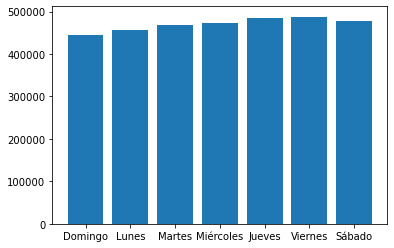

In [31]:
def show_distribution_days(file):
    nombres_dias = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']
    grouped_days = group_by_days(file)
    days = list(grouped_days.keys())

    conteos_dias = []
    for d in days:
        sth = [f.rented for f in grouped_days[d]]
        conteos_dias.append(sum(sth))
    
    plt.bar(range(len(nombres_dias)), conteos_dias, tick_label=nombres_dias)
    plt.show()

show_distribution_days(DATA)

La salida de la celda de test debería ser la siguiente:
![title](./diagrama_barras.png)